<a href="https://colab.research.google.com/github/Sriram-Sudharsan/911DataAnalytics/blob/main/EDA_911.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns


In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
#Reading the data from the csv file
df=pd.read_csv("/content/gdrive/My Drive/Dataset/911.csv")
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1


# **Understanding the Data**

### **Analyzing the shape of the 911 dataset**

In [5]:
df.shape
#No of rows, No of columns are displayed

(663522, 9)

### **Analyzing the column information**

In [6]:
len(df.columns)

9

In [7]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [8]:
df.describe()

,lat,lng,zip,e
count,663522.000000,663522.000000,583323.000000,663522.0
mean,40.158162,-75.300105,19236.055791,1.0
std,0.220641,1.672884,298.222637,0.0
min,0.000000,-119.698206,1104.000000,1.0
25%,40.100344,-75.392735,19038.000000,1.0
50%,40.143927,-75.305143,19401.000000,1.0
75%,40.229008,-75.211865,19446.000000,1.0
max,51.335390,87.854975,77316.000000,1.0


**Categorical Data - Stastical Description**

In [9]:
categorical_data=df.dtypes[df.dtypes==object].index   
df[categorical_data].describe() 

,desc,title,timeStamp,twp,addr
count,663522,663522,663522,663229,663522
unique,663282,148,640754,68,41292
top,CITY AVE & CARDINAL AVE; LOWER MERION; Statio...,Traffic: VEHICLE ACCIDENT -,2018-10-06 19:26:38,LOWER MERION,SHANNONDELL DR & SHANNONDELL BLVD
freq,5,148372,9,55490,7285


### **To check for NULL values**

In [10]:
df.isnull().sum()

lat              0
lng              0
desc             0
zip          80199
title            0
timeStamp        0
twp            293
addr             0
e                0
dtype: int64

### Observation : Zipcode and twp columns have null values

Using forward filling method, we fill the null values in the two columns

In [11]:
columns_fill=["zip","twp"]
df.loc[:,columns_fill]=df.loc[:,columns_fill].ffill()

In [12]:
df.isnull().sum()

lat          0
lng          0
desc         0
zip          0
title        0
timeStamp    0
twp          0
addr         0
e            0
dtype: int64

We notice all Null values have been removed

In [13]:
df.e.unique

<bound method Series.unique of 0         1
1         1
2         1
3         1
4         1
         ..
663517    1
663518    1
663519    1
663520    1
663521    1
Name: e, Length: 663522, dtype: int64>

Dropping the column name labelled "e" as it provides no useful data

In [14]:
df.drop("e",axis=1,inplace=True)

In [15]:
df.columns
#confirms column "e" has been removed

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr'], dtype='object')


### DATA MANIPULATION


Mapping the week day to its corresponding number

In [16]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
time = df['timeStamp'].iloc[31]

print('Hour:',time.hour)
print('Month:',time.month)
print('Day of Week:',time.dayofweek)

df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day'] = df['timeStamp'].apply(lambda x: x.dayofweek)
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
#Extracting year from timeStamp
df["Year"]=df["timeStamp"].dt.year
#Extracting date
df["Date"]=df["timeStamp"].dt.date

datemap = {0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'}

df['Day'] = df['Day'].map(datemap)

Hour: 18
Month: 12
Day of Week: 3


In [17]:
#df.drop("Day of Week",axis=1,inplace=True)

In [18]:
df.head(1)

,lat,lng,desc,zip,title,timeStamp,twp,addr,Month,Day,Hour,Year,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,12,Wed,17,2015,2015-12-10


### **Part2: Splitting title column into category of the emergency and reason**

In [19]:
df["Category"]=df["title"].str.split(":",expand=True)[0]

df["Reason"]=df["title"].str.split(":",expand=True)[1]
1
df.drop("title",axis=1,inplace=True)


In [20]:
df.columns  

Index(['lat', 'lng', 'desc', 'zip', 'timeStamp', 'twp', 'addr', 'Month', 'Day',
       'Hour', 'Year', 'Date', 'Category', 'Reason'],
      dtype='object')

In [21]:
df["Station_code"]=df["desc"].str.split("Station",expand=True)[1]
df["Station_code"]=df["Station_code"].str.split(";",expand=True)[0]
df["Station_code"]=df["Station_code"].str.replace(":"," ")
df["Station_code"].head()

0       332
1       345
2     STA27
3      308A
4       329
Name: Station_code, dtype: object

In [22]:
df.drop("desc",axis=1,inplace=True)

In [23]:
df.columns
#column "Desc" removed

Index(['lat', 'lng', 'zip', 'timeStamp', 'twp', 'addr', 'Month', 'Day', 'Hour',
       'Year', 'Date', 'Category', 'Reason', 'Station_code'],
      dtype='object')

In [24]:
df.drop("timeStamp",axis=1,inplace=True)

### **Exploratory Data Analysis (EDA)**

In this section, we identify the reason for


*   Reason for most emergency calls
*   Township with maximum number of emergency calls
*   Time of the year when most 911 calls are made






In [25]:
df["Reason"].value_counts()

 VEHICLE ACCIDENT -     148372
 DISABLED VEHICLE -      47909
 FIRE ALARM              38452
 VEHICLE ACCIDENT        36377
 FALL VICTIM             34683
                         ...  
 ROAD OBSTRUCTION            2
 FOOT PATROL                 1
 PRISONER IN CUSTODY         1
 ANIMAL COMPLAINT            1
 HIT + RUN                   1
Name: Reason, Length: 95, dtype: int64

In [26]:
df.twp.value_counts()

LOWER MERION       55516
ABINGTON           39961
NORRISTOWN         37646
UPPER MERION       36025
CHELTENHAM         30582
                   ...  
EAST GREENVILLE     1316
BRYN ATHYN          1254
GREEN LANE           385
PHILA COUNTY         267
LEHIGH COUNTY        190
Name: twp, Length: 68, dtype: int64

Top 3 months with highest 911 calls

In [27]:
df["Month"].value_counts().head(3)


1    62336
6    60034
3    60027
Name: Month, dtype: int64

Top 5 stations with maximum number of calls made

In [28]:
top5_station=df["Station_code"].value_counts().head()
top5_station

 308A    25346
 329     21895
 313     20325
 381     15949
 345     14504
Name: Station_code, dtype: int64

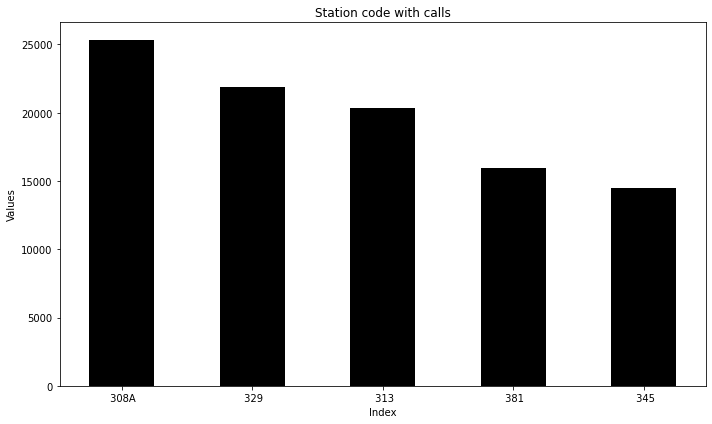

In [29]:
plt.figure(figsize=(10,6))
plt.bar(top5_station.index,top5_station.values,width=0.5,color="black")
plt.xlabel('Index')
plt.ylabel("Values")
plt.title("Station code with calls")
plt.tight_layout()

Inference: Station 308A has highest number of 911 calls

### **Category vs Hour Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


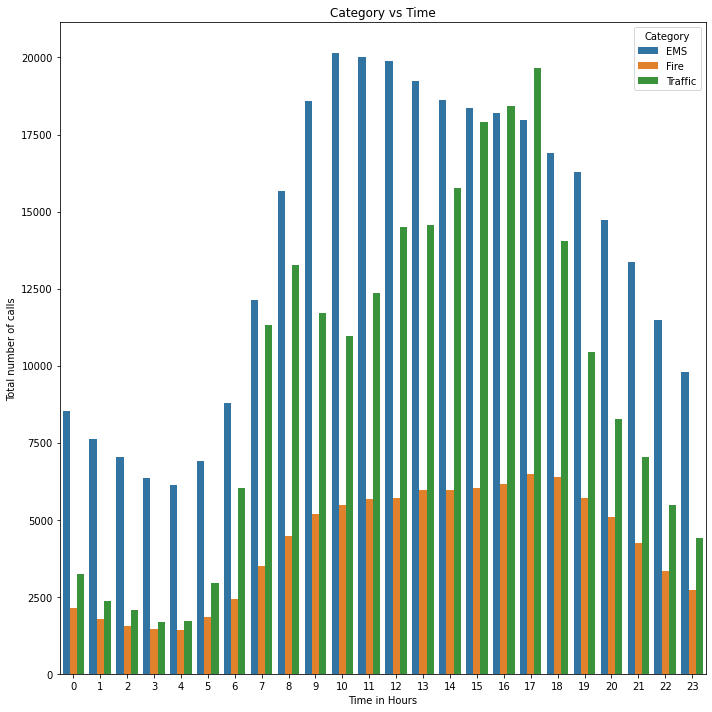

In [30]:
plt.figure(figsize=(10,10))
sns.countplot(df["Hour"],hue=df["Category"],data=df)
plt.xlabel("Time in Hours")
plt.ylabel("Total number of calls")
plt.title("Category vs Time")
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


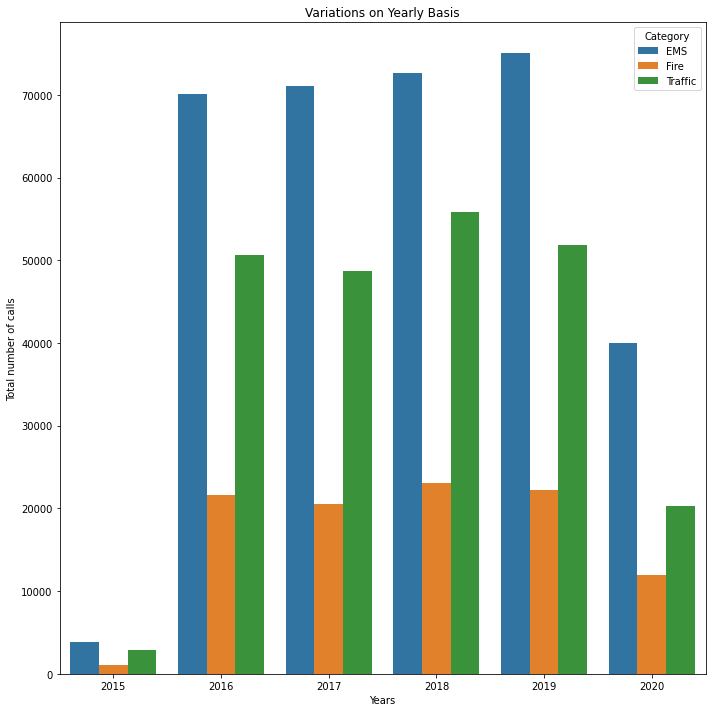

In [32]:
plt.figure(figsize=(10,10))
sns.countplot(df["Year"],hue=df["Category"],data=df)
plt.xlabel("Years")
plt.ylabel("Total number of calls")
plt.title("Variations on Yearly Basis")
plt.tight_layout()

Heatmap 
Day vs Time

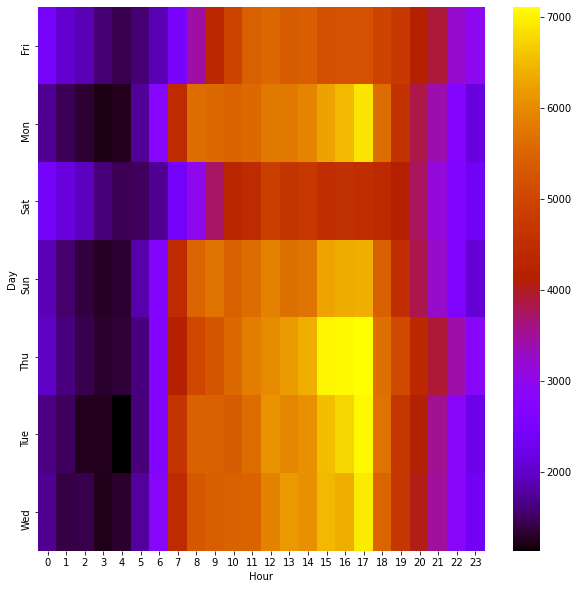

In [36]:
Day_hour=df.groupby([df.Day,df.Hour]).count().Category.unstack() 
plt.figure(figsize=(10,10))
sns.heatmap(Day_hour,linewidth=0.3,linecolor="none",cmap="gnuplot")


Day vs Month

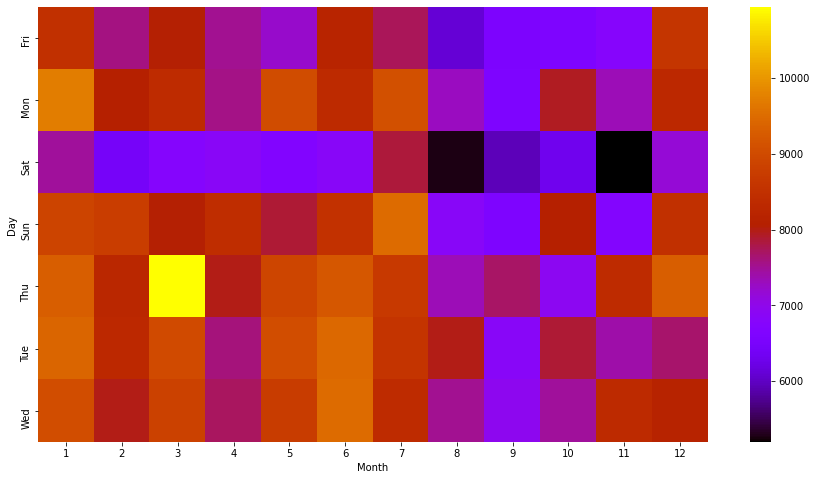

In [39]:
Day_month=df.groupby([df.Day,df.Month]).count().Category.unstack() 

plt.figure(figsize=(15,8))
sns.heatmap(Day_month,linewidth=0.3,linecolor="None",cmap='gnuplot'
)

Inference: We observe that most calls are made between 3pm and 5pm. We also observe that maximum number of calls were made in the month of March on Thursday. 

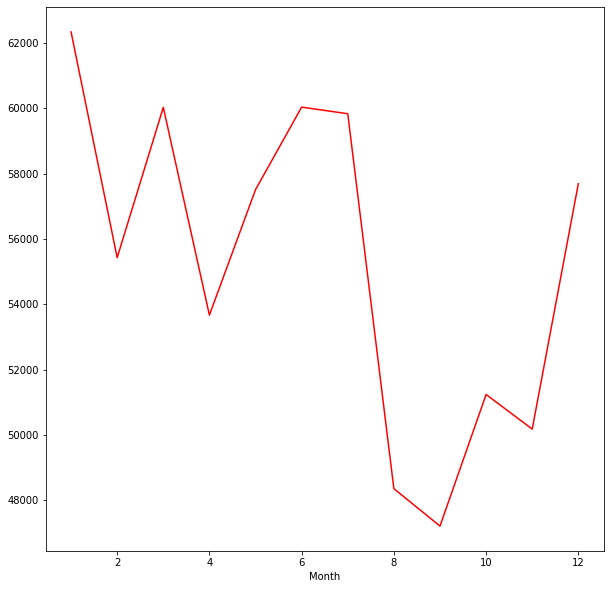

In [41]:
month=df.groupby("Month").count()["Category"]
month.plot(figsize=(10,10),color="red")



Inference: Maximum number of calls were made in the month of January and least number of calls in September